<a href="https://colab.research.google.com/github/AndyK1345/Andrew-Kelly-Final-Project/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = "https://www.transfermarkt.co.uk/fc-arsenal/startseite/verein/11/saison_id/2021"
pageTree = requests.get(page, headers=headers)
pageSoup = BeautifulSoup(pageTree.content, 'html.parser')


Players = pageSoup.find_all("span", {"class": "show-for-small"})
Values = pageSoup.find_all("td", {"class": "rechts hauptlink"})
PlayersList = []
ValuesList = []

length = len(Players)

for i in range(0,length):
    PlayersList.append(Players[i].text)
    ValuesList.append(Values[i].text)
    
df = pd.DataFrame({"Players":PlayersList,"Values":ValuesList})

df

,Players,Values
0,A. Ramsdale,£22.50m
1,B. Leno,£14.40m
2,A. Okonkwo,
3,Ben White,£36.00m
4,Gabriel,£22.50m
5,R. Holding,£10.80m
6,P. Marí,£4.50m
7,K. Tierney,£28.80m
8,N. Tavares,£11.70m
9,S. Kolasinac,£2.70m


In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import csv
import re
import time

def data_to_csv(data):
    keys = data[0].keys()
    with open('fees2020a', 'w', newline='')  as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(data)

def format_text(text):
    regex = re.compile(r'[\n\r\t]')
    text = regex.sub('', text)

    return " ".join(text.split())

def format_currency(value):

    value = value.replace('€', '')
    value = value.replace('Loan fee:', '')
    
    if value[-1] == 'm':
        value = value.replace('m', '')
        return int(float(value)) * 1000000

    if value[-1] == '.':
        value = value.replace('.', '')
        if value[-2:] == 'Th':
            value = value.replace('Th', '')
            return int(value) * 1000
    
    return value

def get_data(pages):
    players_list = []
    for page in range(1, pages+1):
        headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

        url  = f'https://www.transfermarkt.com/transfers/saisontransfers/statistik/top/plus/1/galerie/0?saison_id=2020&transferfenster=alle&land_id=&ausrichtung=&spielerposition_id=&altersklasse=&leihe='

        print('scraping')
        print(url)

        html = requests.get(url, headers=headers)
        soup = bs(html.content)

        soup = soup.select('.responsive-table > .grid-view > .items > tbody')[0]

        try:
            for cells in soup.find_all(True, {"class": re.compile("^(even|odd)$")}):
                fee = cells.find_all('td')[16].text
                position = cells.find_all('td')[4].text
                age = cells.find_all('td')[5].text
                market_value = cells.find_all('td')[6].text
                country_from = cells.find_all('td')[11].img['title']
                league_from = cells.find_all('td')[11].a.text if cells.find_all('td')[11].a != None else 'Without League'
                club_from = cells.find_all('td')[9].img['alt']
                country_to = cells.find_all('td')[15].img['alt']
                league_to = cells.find_all('td')[15].a.text if cells.find_all('td')[15].a != None else 'Without League'
                club_to = cells.find_all('td')[13].img['alt']

                player = {
                    'name': cells.find_all('td')[1].select('td > img')[0]['title'],
                    'position': position,
                    'age': age,
                    'market_value': format_currency(market_value),
                    'country_from': country_from,
                    'league_from': format_text(league_from),
                    'club_from': club_from,
                    'country_to': country_to,
                    'league_to': format_text(league_to),
                    'club_to': club_to,
                    'fee': format_currency(fee),
                }

                players_list.append(player)
        except IndexError:
            pass

    return players_list

    data = get_data(10)

    data_to_csv(data)          

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import csv
import re

def data_to_csv(data):
    keys = data[0].keys()
    with open('fee2020a.csv', 'w', newline='') as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(data)


def format_text(text):
    regex = re.compile(r'[\n\r\t]')
    text = regex.sub('', text)

    return " ".join(text.split())


def format_currency(value):
    value = value.replace('€', '')
    value = value.replace('Loan fee:', '')

    if value[-1] == 'm':
        value = value.replace('m', '')
        return int(float(value)) * 1000000

    if value[-1] == '.':
        value = value.replace('.', '')
        if value[-2:] == 'Th':
            value = value.replace('Th', '')
            return int(value) * 1000

    return value


def get_data(pages):
    players_list = []
    for page in range(1, pages + 1):
        headers = {
            "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

        url = 'https://www.transfermarkt.com/transfers/saisontransfers/statistik/top/plus/0/galerie/0?saison_id=2020&transferfenster=alle&land_id=&ausrichtung=&spielerposition_id=&altersklasse=&leihe='

        print(url)

        html = requests.get(url, headers=headers)
        soup = bs(html.content)

        soup = soup.select('.responsive-table > .grid-view > .items > tbody')[0]

        try:
            for cells in soup.find_all(True, {"class": re.compile("^(even|odd)$")}):
                fee = cells.find_all('td')[16].text
                position = cells.find_all('td')[4].text
                age = cells.find_all('td')[5].text
                market_value = cells.find_all('td')[6].text
                country_from = cells.find_all('td')[11].img['title']
                league_from = cells.find_all('td')[11].a.text if cells.find_all('td')[11].a != None else 'Without League'
                club_from = cells.find_all('td')[9].img['alt']
                country_to = cells.find_all('td')[15].img['alt']
                league_to = cells.find_all('td')[15].a.text if cells.find_all('td')[15].a != None else 'Without League'
                club_to = cells.find_all('td')[13].img['alt']

                player = {
                    'name': cells.find_all('td')[1].select('td > img')[0]['title'],
                    'position': position,
                    'age': age,
                    'market_value': format_currency(market_value),
                    'country_from': country_from,
                    'league_from': format_text(league_from),
                    'club_from': club_from,
                    'country_to': country_to,
                    'league_to': format_text(league_to),
                    'club_to': club_to,
                    'fee': format_currency(fee),
                }

                players_list.append(player)
        except IndexError:
            pass

    return players_list


data = get_data(10)
data_to_csv(data)


In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import csv
import re
import time

def data_to_csv(data):
    keys = data[0].keys()
    with open('fee2021.csv', 'w', newline='')  as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(data)

def format_text(text):
    regex = re.compile(r'[\n\r\t]')
    text = regex.sub('', text)

    return " ".join(text.split())

def format_currency(value):

    value = value.replace('€', '')
    value = value.replace('Loan fee:', '')
    
    if value[-1] == 'm':
        value = value.replace('m', '')
        return int(float(value)) * 1000000

    if value[-1] == '.':
        value = value.replace('.', '')
        if value[-2:] == 'Th':
            value = value.replace('Th', '')
            return int(value) * 1000
    
    return value

def get_data(pages):
    players_list = []
    for page in range(1, pages+1):
        headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

        url  = f'https://www.transfermarkt.com/transfers/saisontransfers/statistik?ajax=yw0&altersklasse=&ausrichtung=&land_id=0&leihe=&page={page}&plus=1&saison-id=2020&spielerposition_id=&transferfenster='

        print('scraping')
        print(url)

        html = requests.get(url, headers=headers)
        soup = bs(html.content)

        soup = soup.select('.responsive-table > .grid-view > .items > tbody')[0]

        try:
            for cells in soup.find_all(True, {"class": re.compile("^(even|odd)$")}):
                fee = cells.find_all('td')[16].text
                position = cells.find_all('td')[4].text
                age = cells.find_all('td')[5].text
                market_value = cells.find_all('td')[6].text
                country_from = cells.find_all('td')[11].img['title']
                league_from = cells.find_all('td')[11].a.text if cells.find_all('td')[11].a != None else 'Without League'
                club_from = cells.find_all('td')[9].img['alt']
                country_to = cells.find_all('td')[15].img['alt']
                league_to = cells.find_all('td')[15].a.text if cells.find_all('td')[15].a != None else 'Without League'
                club_to = cells.find_all('td')[13].img['alt']

                player = {
                    'name': cells.find_all('td')[1].select('td > img')[0]['title'],
                    'position': position,
                    'age': age,
                    'market_value': format_currency(market_value),
                    'country_from': country_from,
                    'league_from': format_text(league_from),
                    'club_from': club_from,
                    'country_to': country_to,
                    'league_to': format_text(league_to),
                    'club_to': club_to,
                    'fee': format_currency(fee),
                }

                players_list.append(player)
        except IndexError:
            pass

    return players_list

data = get_data(20)

data_to_csv(data)

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import csv
import re
import time

def data_to_csv(data):
    keys = data[0].keys()
    with open('fee2020b.csv', 'w', newline='')  as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(data)

def format_text(text):
    regex = re.compile(r'[\n\r\t]')
    text = regex.sub('', text)

    return " ".join(text.split())

def format_currency(value):

    value = value.replace('€', '')
    value = value.replace('Loan fee:', '')
    
    if value[-1] == 'm':
        value = value.replace('m', '')
        return int(float(value)) * 1000000

    if value[-1] == '.':
        value = value.replace('.', '')
        if value[-2:] == 'Th':
            value = value.replace('Th', '')
            return int(value) * 1000
    
    return value

def get_data(pages):
    players_list = []
    for page in range(1, pages+1):
        headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

        url  = f'https://www.transfermarkt.com/transfers/saisontransfers/statistik/top/plus/1/galerie/0?saison_id=2020&transferfenster=alle&land_id=&ausrichtung=&spielerposition_id=&altersklasse=&leihe='

        print('scraping')
        print(url)

        html = requests.get(url, headers=headers)
        soup = bs(html.content)

        soup = soup.select('.responsive-table > .grid-view > .items > tbody')[0]

        try:
            for cells in soup.find_all(True, {"class": re.compile("^(even|odd)$")}):
                fee = cells.find_all('td')[16].text
                position = cells.find_all('td')[4].text
                age = cells.find_all('td')[5].text
                market_value = cells.find_all('td')[6].text
                country_from = cells.find_all('td')[11].img['title']
                league_from = cells.find_all('td')[11].a.text if cells.find_all('td')[11].a != None else 'Without League'
                club_from = cells.find_all('td')[9].img['alt']
                country_to = cells.find_all('td')[15].img['alt']
                league_to = cells.find_all('td')[15].a.text if cells.find_all('td')[15].a != None else 'Without League'
                club_to = cells.find_all('td')[13].img['alt']

                player = {
                    'name': cells.find_all('td')[1].select('td > img')[0]['title'],
                    'position': position,
                    'age': age,
                    'market_value': format_currency(market_value),
                    'country_from': country_from,
                    'league_from': format_text(league_from),
                    'club_from': club_from,
                    'country_to': country_to,
                    'league_to': format_text(league_to),
                    'club_to': club_to,
                    'fee': format_currency(fee),
                }

                players_list.append(player)
        except IndexError:
            pass

    return players_list

data = get_data(1)

data_to_csv(data)

This is code for the transfer figures of players

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import requests
from bs4 import BeautifulSoup as bs
import csv
import re

def data_to_csv(data):
    keys = data[0].keys()
    with open('data11.csv', 'w', newline='')  as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(data)

url = 'https://www.statista.com/statistics/675303/average-epl-salary-by-team//'

soup = BeautifulSoup(requests.get(url).content, 'html.parser')

tds = soup.select('#statTableHTML td')
data = []
for td1, td2 in zip(tds[::2], tds[1::2]):
    data.append({'Team':td1.text, 'Avg Yearly Salary Per Player $(millions)': td2.text})

df = pd.DataFrame(data)
print(df)
data_to_csv(data)

              Team Avg Yearly Salary Per Player $(millions)
0         Man City                                     8.73
1          Man Utd                                     7.66
2        Liverpool                                     6.92
3          Arsenal                                     5.99
4          Chelsea                                     5.97
5          Everton                                     5.13
6        Tottenham                                     4.95
7        Leicester                                     4.19
8         West Ham                                     3.78
9   Crystal Palace                                     3.61
10     Southampton                                     2.87
11          Wolves                                     2.75
12       Newcastle                                     2.61
13         Watford                                     2.53
14     Aston Villa                                     2.46
15     Bournemouth                      

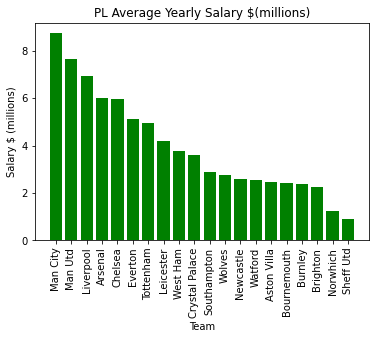

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
data = pd.read_csv('data11.csv')

df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("PL Average Yearly Salary $(millions)")
plt.xlabel("Team")
plt.ylabel("Salary $ (millions)")
plt.xticks(rotation=90)

# Show the plot
plt.show()


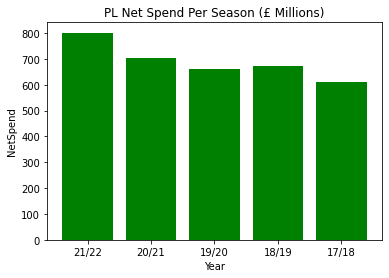

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
data = pd.read_csv('PLNet.csv')

df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("PL Net Spend Per Season (£ Millions)")
plt.xlabel("Year")
plt.ylabel("NetSpend")


# Show the plot
plt.show()

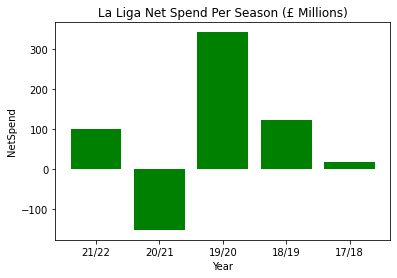

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
data = pd.read_csv('LaLigaNet.csv')

df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("La Liga Net Spend Per Season (£ Millions)")
plt.xlabel("Year")
plt.ylabel("NetSpend")


# Show the plot
plt.show()

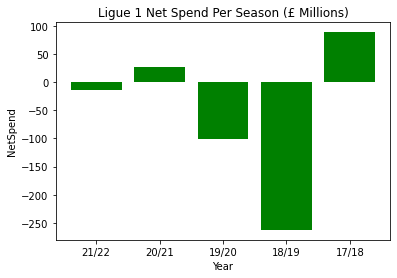

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
data = pd.read_csv('Ligue1Net.csv')

df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Ligue 1 Net Spend Per Season (£ Millions)")
plt.xlabel("Year")
plt.ylabel("NetSpend")


# Show the plot
plt.show()

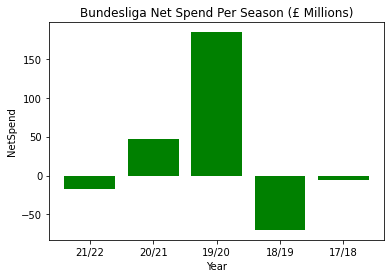

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
data = pd.read_csv('BundesNet.csv')

df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Bundesliga Net Spend Per Season (£ Millions)")
plt.xlabel("Year")
plt.ylabel("NetSpend")


# Show the plot
plt.show()

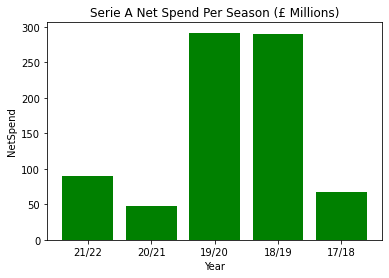

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
data = pd.read_csv('serieanet.csv')

df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Serie A Net Spend Per Season (£ Millions)")
plt.xlabel("Year")
plt.ylabel("NetSpend")


# Show the plot
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import csv
import re

def data_to_csv(data):
    keys = data[0].keys()
    with open('data10.csv', 'w', newline='')  as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(data)

url = 'https://www.statista.com/statistics/675461/average-la-liga-salary-by-team/'

soup = BeautifulSoup(requests.get(url).content, 'html.parser')

tds = soup.select('#statTableHTML td')
data = []
for td1, td2 in zip(tds[::2], tds[1::2]):
    data.append({'Team':td1.text, 'Avg Yearly Salary Per Player $': td2.text})

df = pd.DataFrame(data)
print(df)
data_to_csv(data)

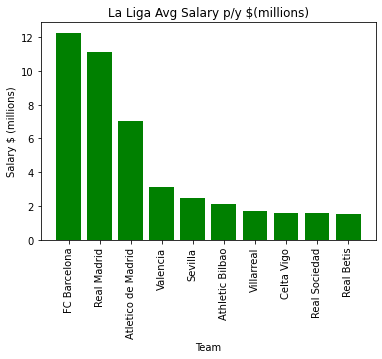

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
data = pd.read_csv('data10.csv')

df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("La Liga Avg Salary p/y $(millions)")
plt.xlabel("Team")
plt.ylabel("Salary $ (millions)")
plt.xticks(rotation=90)

# Show the plot
plt.show()

This is code for salaries of players from statista

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import csv
import re

def data_to_csv(data):
    keys = data[0].keys()
    with open('data9.csv', 'w', newline='')  as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(data)

url = 'https://www.statista.com/statistics/675470/average-serie-a-salary-by-team/'

soup = BeautifulSoup(requests.get(url).content, 'html.parser')

tds = soup.select('#statTableHTML td')
data = []
for td1, td2 in zip(tds[::2], tds[1::2]):
    data.append({'Team':td1.text, 'Avg Yearly Salary Per Player $': td2.text})

df = pd.DataFrame(data)
print(df)
data_to_csv(data)

              Team Avg Yearly Salary Per Player $
0         Juventus                          10.11
1             Roma                           4.49
2   Internazionale                           4.08
3           Napoli                           3.82
4            Milan                           3.44
5            Lazio                           2.41
6           Torino                           1.82
7          Bologna                           1.57
8       Fiorentina                           1.51
9         Cagliari                           1.44
10        Atalanta                           1.28
11           Genoa                           1.25
12       Sampdoria                            1.2
13        Sassuolo                           1.14
14           Lecce                           1.07
15           Parma                           1.04
16            SPAL                           0.99
17         Udinese                           0.84
18   Hellas Verona                           0.64


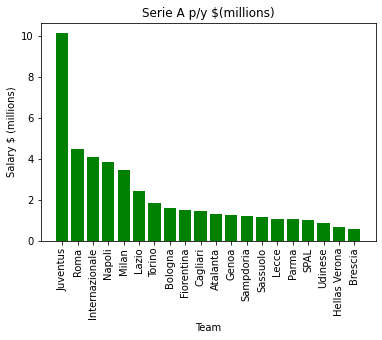

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
data = pd.read_csv('data9.csv')

df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Serie A p/y $(millions)")
plt.xlabel("Team")
plt.ylabel("Salary $ (millions)")
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import csv
import re

def data_to_csv(data):
    keys = data[0].keys()
    with open('data8.csv', 'w', newline='')  as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(data)

url = 'https://www.statista.com/statistics/675490/average-bundesliga-salary-by-team/#:~:text=Average%20player%20salary%20in%20the%20Bundesliga%202019%2F20%2C%20by%20team&text=The%20average%20annual%20player%20salary,the%20first%20Bundesliga%20in%20Germany.'

soup = BeautifulSoup(requests.get(url).content, 'html.parser')

tds = soup.select('#statTableHTML td')
data = []
for td1, td2 in zip(tds[::2], tds[1::2]):
    data.append({'Team':td1.text, 'Avg Yearly Salary Per Player $': td2.text})

df = pd.DataFrame(data)
print(df)
data_to_csv(data)

                        Team Avg Yearly Salary Per Player $
0              Bayern Munich                           8.12
1          Borussia Dortmund                           4.97
2           Bayer Leverkusen                           3.19
3                 RB Leipzig                           2.42
4                  Wolfsburg                           2.41
5                    Schalke                           2.19
6   Borussia Monchengladbach                           1.92
7                 Hoffenheim                            1.7
8              Werder Bremen                           1.57
9        Eintracht Frankfurt                           1.54
10             Hertha Berlin                            1.3
11                   FC Koln                           1.22
12                  Augsburg                           1.02
13                     Mainz                           0.85
14        Fortuna Dusseldorf                           0.76
15               SC Freiburg            

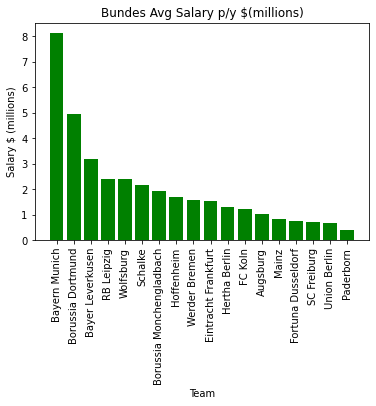

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
data = pd.read_csv('data8.csv')

df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Bundes Avg Salary p/y $(millions)")
plt.xlabel("Team")
plt.ylabel("Salary $ (millions)")
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import csv
import re

def data_to_csv(data):
    keys = data[0].keys()
    with open('data7.csv', 'w', newline='')  as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(data)

url = 'https://www.statista.com/statistics/675528/average-ligue-1-salary-by-team/'

soup = BeautifulSoup(requests.get(url).content, 'html.parser')

tds = soup.select('#statTableHTML td')
data = []
for td1, td2 in zip(tds[::2], tds[1::2]):
    data.append({'Team':td1.text, 'Avg Yearly Salary Per Player $': td2.text})

df = pd.DataFrame(data)
print(df)
data_to_csv(data)

             Team Avg Yearly Salary Per Player $
0             PSG                           8.93
1          Monaco                           2.84
2            Lyon                           2.33
3       Marseille                           2.01
4           Lille                           1.33
5   Saint-Etienne                           1.01
6          Rennes                           0.98
7        Bordeaux                           0.82
8            Nice                           0.74
9     Montpellier                           0.68
10         Nantes                           0.68
11       Toulouse                           0.61
12         Angers                           0.49
13     Strasbourg                           0.47
14         Amiens                           0.41
15          Dijon                           0.41
16          Reims                            0.4
17           Metz                            0.4
18          Brest                           0.35
19          Nimes   

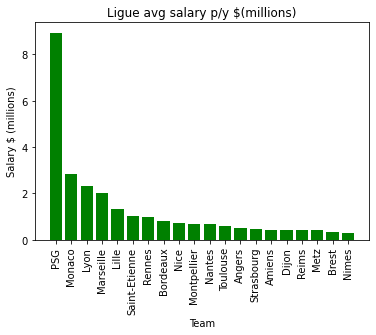

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
data = pd.read_csv('data7.csv')

df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Ligue avg salary p/y $(millions)")
plt.xlabel("Team")
plt.ylabel("Salary $ (millions)")
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import csv
import re

def data_to_csv(data):
    keys = data[0].keys()
    with open('data6.csv', 'w', newline='')  as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(data)

url = 'https://www.statista.com/statistics/566666/premier-league-clubs-by-revenue/'

soup = BeautifulSoup(requests.get(url).content, 'html.parser')

tds = soup.select('#statTableHTML td')
data = []
for td1, td2 in zip(tds[::2], tds[1::2]):
    data.append({'Team':td1.text, 'Season Revenue($)': td2.text})

df = pd.DataFrame(data)
print(df)
data_to_csv(data)

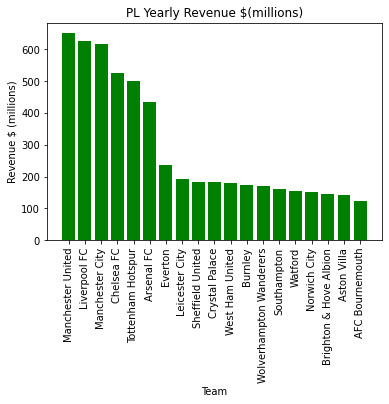

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
data = pd.read_csv('data6.csv')

df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("PL Yearly Revenue $(millions)")
plt.xlabel("Team")
plt.ylabel("Revenue $ (millions)")
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import csv
import re

def data_to_csv(data):
    keys = data[0].keys()
    with open('data5.csv', 'w', newline='')  as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(data)

url = 'https://www.statista.com/statistics/254513/value-of-jersey-kit-sponsorships-in-the-barclays-premier-league-by-club/'

soup = BeautifulSoup(requests.get(url).content, 'html.parser')

tds = soup.select('#statTableHTML td')
data = []
for td1, td2 in zip(tds[::2], tds[1::2]):
    data.append({'Team':td1.text, 'Kit sponsor 19/20(£)': td2.text})

df = pd.DataFrame(data)
print(df)
data_to_csv(data)

In [ ]:
pip install BeautifulSoup4

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
data = pd.read_csv('data5.csv')

df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Kit Sponsors $(millions)")
plt.xlabel("Team")
plt.ylabel("Income $ (millions)")
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import csv
import re

def data_to_csv(data):
    keys = data[0].keys()
    with open('data4.csv', 'w', newline='')  as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(data)

url = 'https://www.statista.com/statistics/261225/top-european-soccer-leagues-big-five-revenue/'

soup = BeautifulSoup(requests.get(url).content, 'html.parser')

tds = soup.select('#statTableHTML td')
data = []
for td1, td2 in zip(tds[::2], tds[1::2]):
    data.append({'Year':td1.text, 'Top 5 League Season Revenue($)millions': td2.text})

df = pd.DataFrame(data)
print(df)
data_to_csv(data)

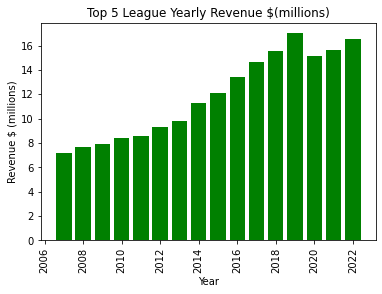

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
data = pd.read_csv('Top5Rev.csv')

df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Top 5 League Yearly Revenue $(millions)")
plt.xlabel("Year")
plt.ylabel("Revenue $ (millions)")
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import csv
import re

def data_to_csv(data):
    keys = data[0].keys()
    with open('data3.csv', 'w', newline='')  as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(data)

url = 'https://www.statista.com/statistics/271581/revenue-of-soccer-clubs-worldwide/'

soup = BeautifulSoup(requests.get(url).content, 'html.parser')

tds = soup.select('#statTableHTML td')
data = []
for td1, td2 in zip(tds[::2], tds[1::2]):
    data.append({'Team':td1.text, '19/20 Season Revenue($)': td2.text})

df = pd.DataFrame(data)
print(df)
data_to_csv(data)

                         Team 19/20 Season Revenue($)
0                FC Barcelona                   715.1
1                 Real Madrid                   691.8
2               Bayern Munich                   634.1
3           Manchester United                   580.4
4                Liverpool FC                   558.6
5             Manchester City                   549.2
6         Paris Saint-Germain                   540.6
7                  Chelsea FC                   469.7
8           Tottenham Hotspur                   445.7
9              Juventus Turin                   397.9
10                 Arsenal FC                     388
11          Borussia Dortmund                   365.7
12            Atlético Madrid                   331.8
13       Internazionale Milan                   291.5
14  FC Zenit Saint Petersburg                   236.5
15                 Schalke 04                   222.8
16                    Everton                     212
17         Olympique Lyonnai

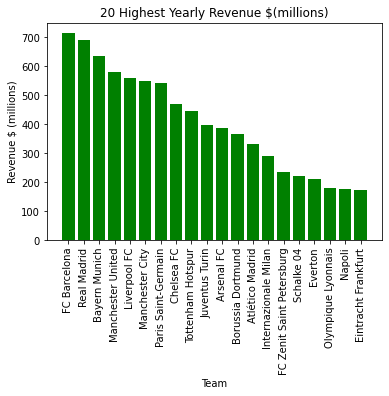

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
data = pd.read_csv('data3.csv')

df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("20 Highest Yearly Revenue $(millions)")
plt.xlabel("Team")
plt.ylabel("Revenue $ (millions)")
plt.xticks(rotation=90)

# Show the plot
plt.show()

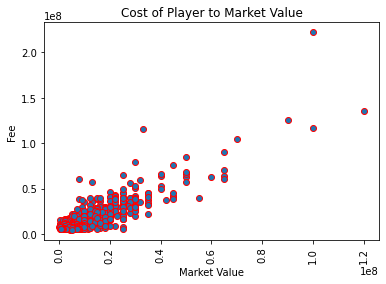

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

d = pd.read_csv('toptransfers.csv')
Market_value = d['Market_value']
Transfer_fee = d['Transfer_fee']
plt.scatter(Market_value, Transfer_fee, edgecolors='r')
plt.xlabel('Market Value')
plt.ylabel('Fee')
plt.title('Cost of Player to Market Value')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from csv import writer
import csv
from sched import scheduler
from typing import Collection
import tweepy
import configparser
import pandas as pd
import requests



# read configs
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)




csvheader =['User','Tweet']
#search tweets
keywords = 'gabriel jesus transfer'
limit=1000
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)



# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:

    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)



print(df)
df.to_csv('transfer2.csv')


               User                                              Tweet
0    Ahmed_musayaro  RT @London_Highbury: Transfer Prediction: #afc...
1      FPLtanzanite  RT @London_Highbury: Transfer Prediction: #afc...
2     GunnersReddit  [Thiago Fernandes and Raisa Simplicio] Arsenal...
3      binh2401coyg  RT @London_Highbury: Transfer Prediction: #afc...
4      LOLpundit007  RT @London_Highbury: Transfer Prediction: #afc...
..              ...                                                ...
995  CitizensAddict  Gabriel Jesus’ agent reveals Manchester City f...
996   FoldMaulana30  RT @DeadlineDayLive: 🚨 Arsenal are ready to st...
997  TheSunFootball  Gabriel Jesus' agent confirms Arsenal talks - ...
998     Mangakiko12  Gabriel Jesus wanted by Arsenal and likes the ...
999   adabagcompany  ‘We like the project’ – Gabriel Jesus’ agent C...

[1000 rows x 2 columns]


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
df=pd.read_csv('transfer2.csv')

#Sentiment Analysis
SIA = SentimentIntensityAnalyzer()
df["Tweet"]= df["Tweet"].astype(str)
# Applying Model, Variable Creation
df['Polarity Score']=df["Tweet"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Tweet"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["Tweet"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["Tweet"].apply(lambda x:SIA.polarity_scores(x)['pos'])
# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'
df[:100]
df.to_csv('sentimenttest3.csv')

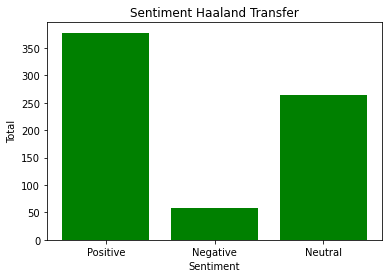

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the lists for X and Y
data = pd.read_csv('book1.csv')

df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Sentiment Haaland Transfer")
plt.xlabel("Sentiment")
plt.ylabel("Total")

# Show the plot
plt.show()

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
df=pd.read_csv("book1.csv")
df.head()

,Sentiment,Total
0,Positive,378
1,Negative,58
2,Neutral,264


In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Scatterpolar(
  r=[378, 58, 264],
  theta=['Positive','Negative','Neutral'],
  fill='toself'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False
)

fig.update_layout(title_text='Haaland', title_x=0.5)

fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r=[33, 14, 404],
  theta=['Positive','Negative','Neutral'],
  fill='toself'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False
)

fig.update_layout(title_text='Jadon Sancho', title_x=0.5)

fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r=[343, 11, 646],
  theta=['Positive','Negative','Neutral'],
  fill='toself'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False
)

fig.update_layout(title_text='Gabriel Jesus', title_x=0.5)

fig.show()

In [ ]:
import plotly.graph_objects as go

players = ['Positive','Negative','Neutral']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
  r=[378, 58, 264],
  theta=players,
  fill='toself',
  name='Haaland'
))

fig.add_trace(go.Scatterpolar(
  r=[348, 11, 646],
  theta=players,
  fill='toself',
  name='Jesus'
))

fig.add_trace(go.Scatterpolar(
  r=[33, 14, 404],
  theta=players,
  fill='toself',
  name='Sancho'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 700]
    ),
  ),
  showlegend=False
)

fig.show()

Multi Linear

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

In [ ]:
#Reading the dataset
dataset = pd.read_csv("toptransfers.csv")

In [ ]:
dataset.head()

,Name,Age,Team_from,League_from,Team_to,League_to,Season,marketvalue,fee
0,Julian Draxler,21,FC Schalke 04,1.Bundesliga,VfL Wolfsburg,1.Bundesliga,2015-2016,22000000,43000000
1,Arturo Vidal,28,Juventus,Serie A,Bayern Munich,1.Bundesliga,2015-2016,42000000,37500000
2,Douglas Costa,24,Shakhtar D.,Premier Liga,Bayern Munich,1.Bundesliga,2015-2016,23000000,30000000
3,Charles Aránguiz,26,Internacional,Série A,Bay. Leverkusen,1.Bundesliga,2015-2016,9500000,13000000
4,Max Kruse,27,Bor. M'gladbach,1.Bundesliga,VfL Wolfsburg,1.Bundesliga,2015-2016,12000000,12000000


In [ ]:
dataset.shape

(765, 9)

In [ ]:
dataset.isna().sum()

Name           0
Age            0
Team_from      0
League_from    0
Team_to        0
League_to      0
Season         0
marketvalue    0
fee            0
dtype: int64

In [ ]:
dataset.duplicated().any()

False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


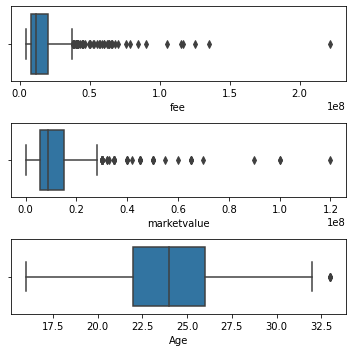

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['fee'], ax = axs[0])
plt2 = sns.boxplot(dataset['marketvalue'], ax = axs[1])
plt3 = sns.boxplot(dataset['Age'], ax = axs[2])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


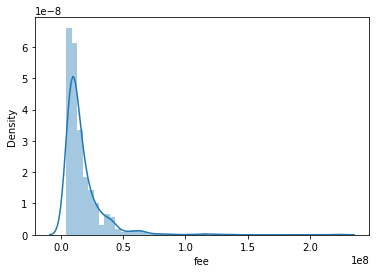

In [ ]:
sns.distplot(dataset['fee']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


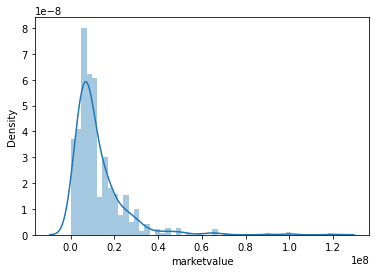

In [ ]:
sns.distplot(dataset['marketvalue']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


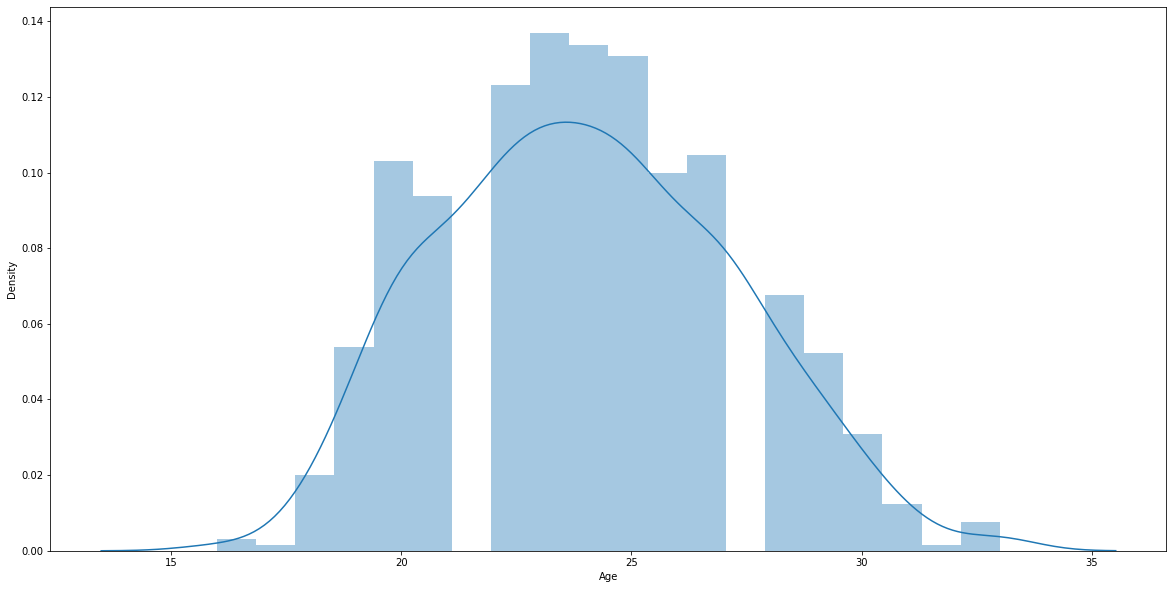

In [ ]:
sns.distplot(dataset['Age']);

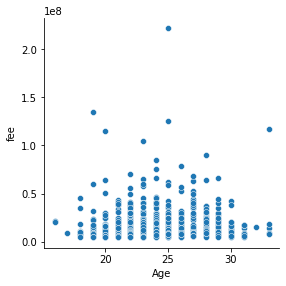

In [ ]:
sns.pairplot(dataset, x_vars=['Age'], y_vars='fee', height=4, aspect=1, kind='scatter')
plt.show()

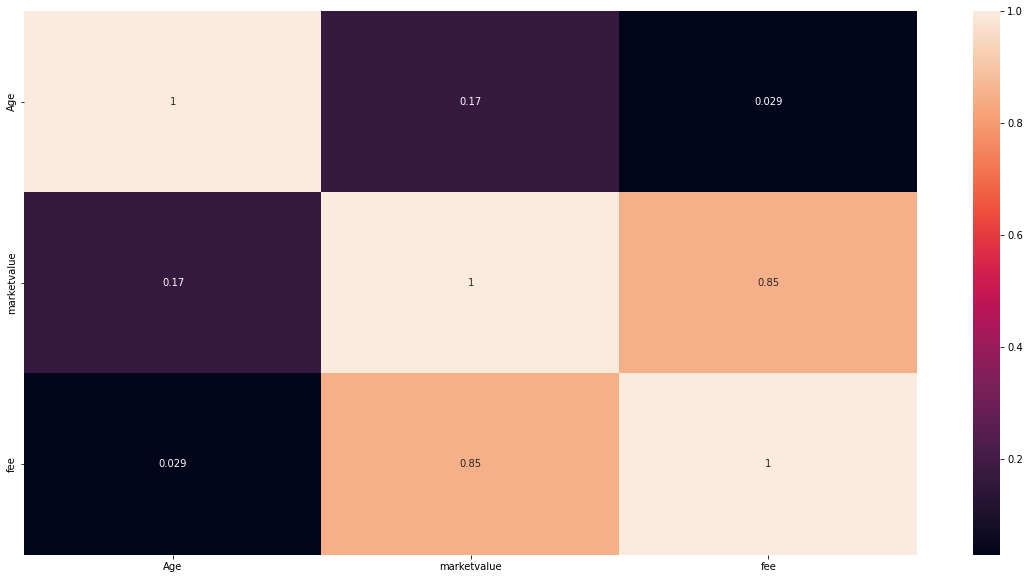

In [ ]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("toptransfers.csv")

dataset.head()

x = dataset[['marketvalue', 'Age']]
y = dataset['fee']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=100)

mlr= LinearRegression()  
mlr.fit(x_train, y_train)

#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)

print("Prediction for test set: {}".format(y_pred_mlr))

#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff



16338450.478526315
Prediction for test set: [25922880.97167838  7635428.09249269 11631531.02352739 30368284.71787436
 29572172.40233303 34629207.69746415 26616503.9724385  13874730.75958162
 32732819.46178998 18685791.69923783 22987710.40474011 18053662.28734644
 20541184.20899951 58971482.47713259 11325715.24905982  5841529.17159973
 38176009.81333758  8899686.91627547  8429888.23815795 10755079.42603716
 26616503.9724385  11510196.015666    9490820.60225437 17462528.60136753
 14342877.26782307 14893015.22788949  6941805.09173257 35811475.06942196
  4618266.07372944 17544520.0531925  12610471.93579884 11346213.11201606
 11305217.38610357 11305217.38610357 10081954.28823328 26025370.2864596
 53651279.30332245  8185566.05255911 21214309.34680339 19909054.79710812
  8961180.5051442  27921758.52213377  7676423.81840518 37075733.89320474
 13792739.30775665 22987710.40474011  8899686.91627547 20459192.75717454
 11978342.52390745  8349548.95620905  8226561.77847159 13690249.99297544
 2357884

,Actual value,Predicted value
173,10000000,2.592288e+07
252,15000000,7.635428e+06
207,11500000,1.163153e+07
490,24500000,3.036828e+07
191,22500000,2.957217e+07
...,...,...
762,5000000,4.067467e+06
203,12500000,1.130522e+07
216,7500000,9.572812e+06
404,66000000,6.035873e+07


In [ ]:
#Predict for any value
mlr.predict([[23000000, 24]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([30286293.26604939])

In [ ]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 73.92


In [ ]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 5320218.636300767
Mean Square Error: 55342106101915.18
Root Mean Square Error: 7439227.520510122


***Single Linear***

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the dataset
dataset = pd.read_csv("toptransfers.csv")

In [ ]:
dataset.head()

,Name,Age,Team_from,League_from,Team_to,League_to,Season,marketvalue,fee
0,Julian Draxler,21,FC Schalke 04,1.Bundesliga,VfL Wolfsburg,1.Bundesliga,2015-2016,22000000,43000000
1,Arturo Vidal,28,Juventus,Serie A,Bayern Munich,1.Bundesliga,2015-2016,42000000,37500000
2,Douglas Costa,24,Shakhtar D.,Premier Liga,Bayern Munich,1.Bundesliga,2015-2016,23000000,30000000
3,Charles Aránguiz,26,Internacional,Série A,Bay. Leverkusen,1.Bundesliga,2015-2016,9500000,13000000
4,Max Kruse,27,Bor. M'gladbach,1.Bundesliga,VfL Wolfsburg,1.Bundesliga,2015-2016,12000000,12000000


In [ ]:
dataset.shape

(765, 9)

In [ ]:
dataset.isna().sum()

Name           0
Age            0
Team_from      0
League_from    0
Team_to        0
League_to      0
Season         0
marketvalue    0
fee            0
dtype: int64

In [ ]:
dataset.duplicated().any()

False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



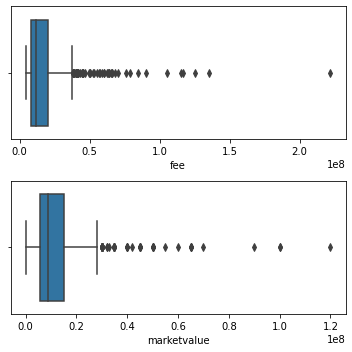

In [ ]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(dataset['fee'], ax = axs[0])
plt2 = sns.boxplot(dataset['marketvalue'], ax = axs[1])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



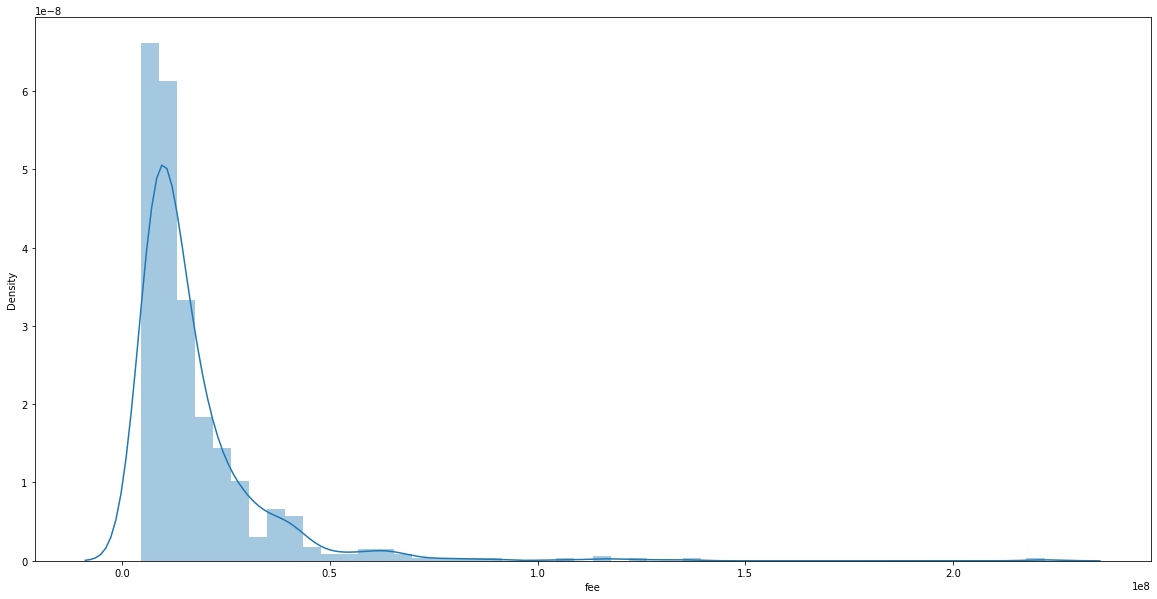

In [ ]:
sns.distplot(dataset['fee']);

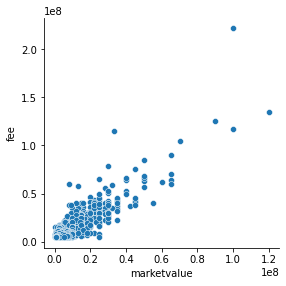

In [ ]:
sns.pairplot(dataset, x_vars=['marketvalue'], y_vars='fee', height=4, aspect=1, kind='scatter')
plt.show()

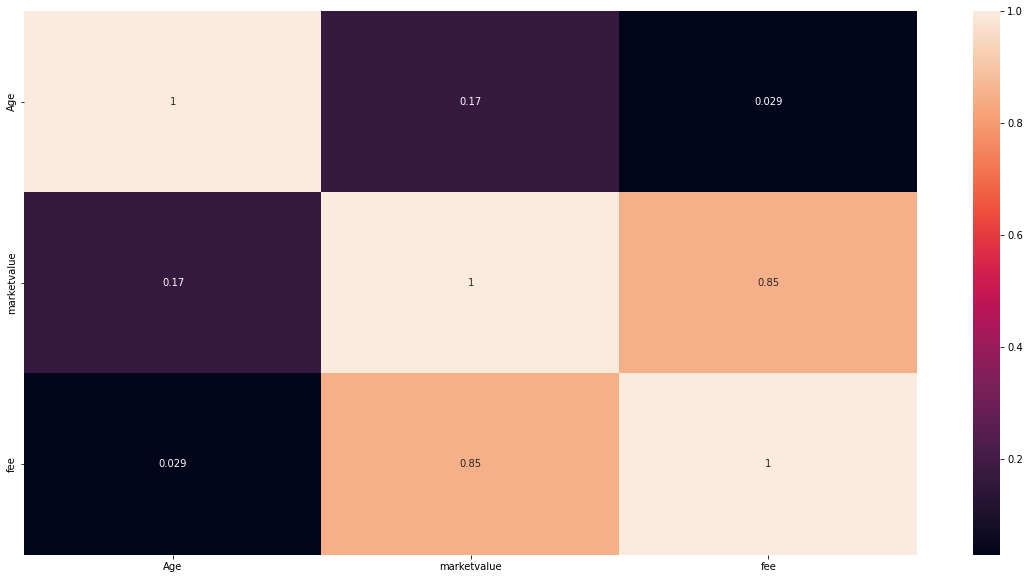

In [ ]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#Setting the value for X and Y
x = dataset[['fee']]
y = dataset['marketvalue']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  1954460.898017032
Coefficient: [0.59877945]


In [ ]:
print('Regression Equation: Sales = 1954460.898017032 + 0.59877945 * Fee')

Regression Equation: Sales = 1954460.898017032 + 0.59877945 * Fee


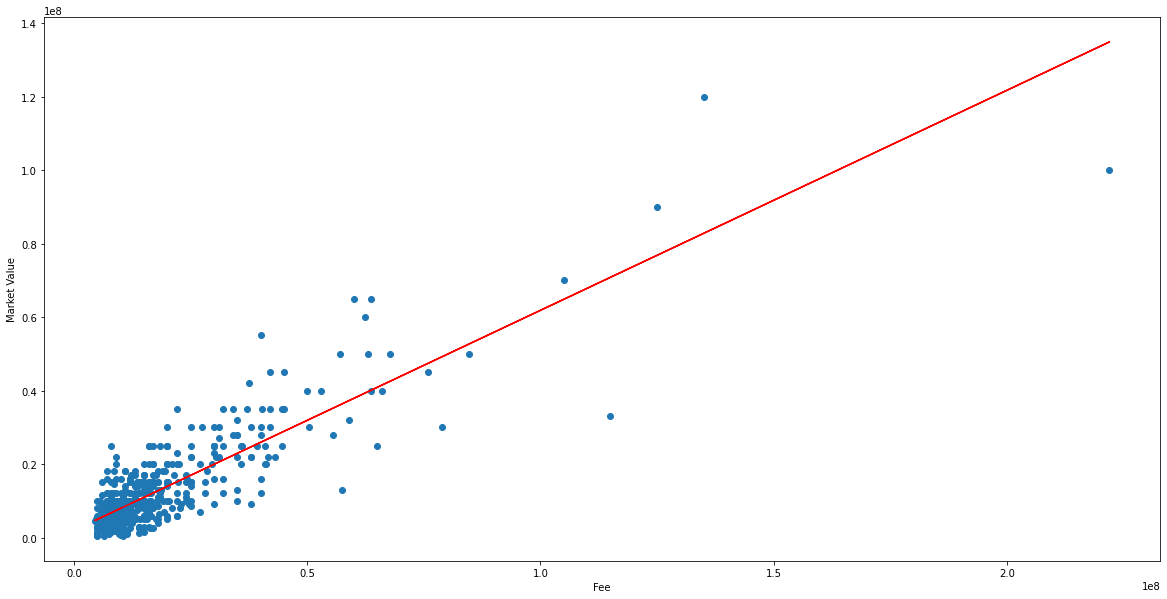

In [ ]:
#Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train, 1954460.898017032 + 0.59877945*x_train, 'r')
plt.xlabel("Fee")
plt.ylabel("Market Value")
plt.show()

In [ ]:
#Prediction of Test and Training set result  
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)  

In [ ]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [ 7942255.39963977 10936152.65045114  8840424.57488318 16624557.42699275
 15426998.5266682  15666510.30673311 17522726.60223616  7942255.39963977
 22911741.65369663 16923947.15207388  8541034.84980205  7044086.22439636
 19917844.40288525 26504418.35467027  6744696.49931522 10936152.65045114
 25905638.90450799  5547137.59899068  7103964.16941259  4948358.1488284
 29797705.33056278 10337373.20028887  6624940.60928277 16325167.70191161
  7942255.39963977 37881227.90775348  7223720.05944504 18959797.28262562
  7642865.67455864 12732491.00093796  6145917.04915295  9139814.29996432
  7343475.9494775   6744696.49931522  6145917.04915295 18420895.77747957
 24708080.00418345  7942255.39963977 12612735.11090551 14049805.79129497
  5547137.59899068 13930049.90126251  6445306.77423409 33510137.92156888
 13930049.90126251 16385045.64692784  5846527.32407181  7642865.67455864
  7642865.67455864  6205794.99416918  7822499.50960732  6445306.77423409
 19917844.40288525 19917844

In [ ]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
173,17500000,7.942255e+06
252,4000000,1.093615e+07
207,7750000,8.840425e+06
490,25000000,1.662456e+07
191,20000000,1.542700e+07
...,...,...
174,15000000,7.044086e+06
586,7000000,8.241645e+06
374,25000000,1.393005e+07
111,8000000,8.541035e+06


In [ ]:
#Predict for any value
slr.predict([[9000000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([7343475.9494775])

In [ ]:
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 72.52


In [ ]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 4190044.3687812886
Mean Square Error: 36826068074340.76
Root Mean Square Error: 6068448.572274528


New LSTM

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(18)

In [ ]:
# load the dataset
dataframe = pandas.read_csv('LSTMTransfers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('int')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.60)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 7384128.80 RMSE
Test Score: 10032392.89 RMSE


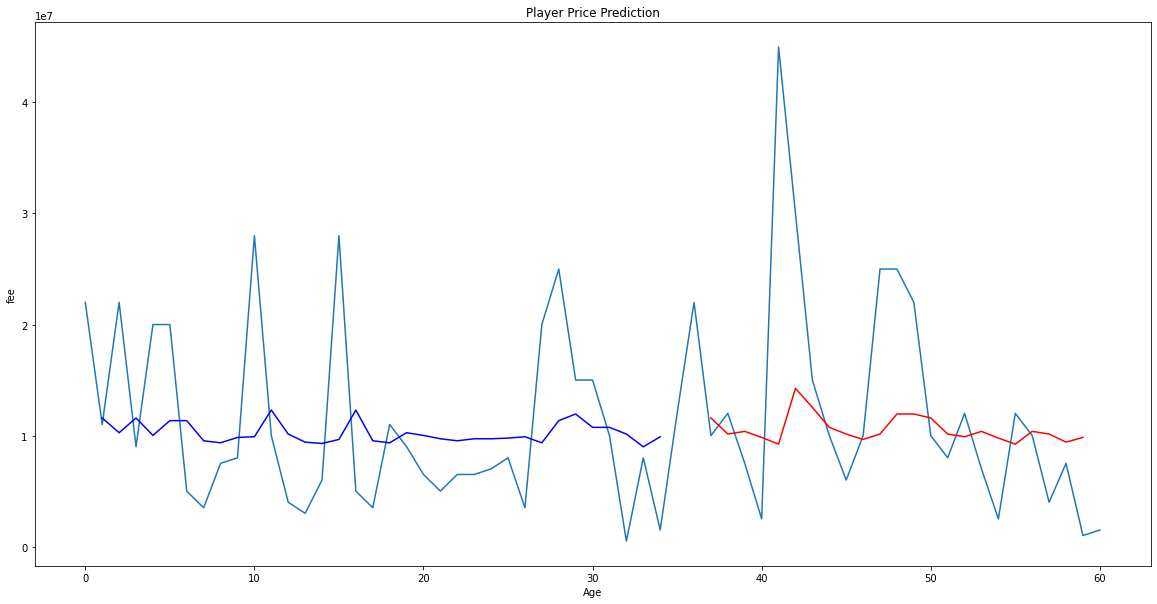

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(testPredictPlot, color = 'red', label='Actual Value')

plt.plot(trainPredictPlot, color = 'blue', label='Predicted Value')
plt.title('Player Price Prediction')
plt.xlabel("Age")
plt.ylabel("fee")
plt.show()

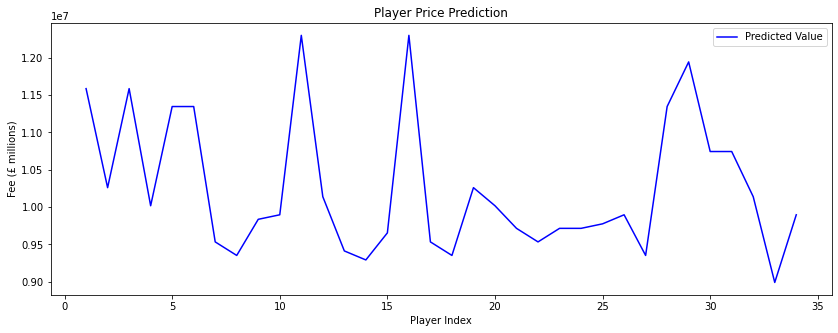

In [ ]:
# Visualising the results

plt.figure(figsize=(14,5))

#plt.plot(testPredictPlot[0:y_test.shape[0]-5], color = 'red', label='Actual Value')

plt.plot(trainPredictPlot, color = 'blue', label='Predicted Value')

plt.title('Player Price Prediction')

plt.xlabel('Player Index')

plt.ylabel('Fee (£ millions)')

plt.legend()

plt.show()

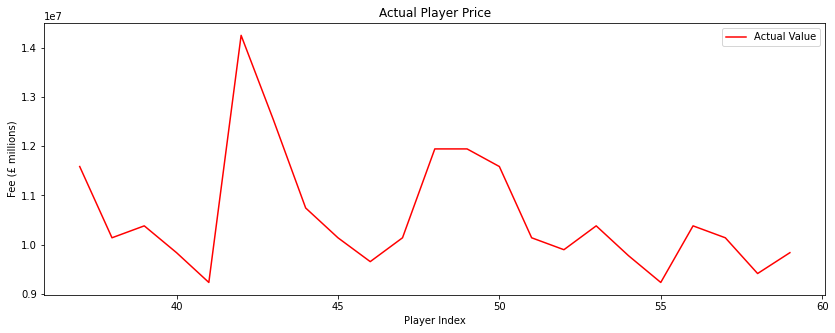

In [ ]:
# Visualising the results

plt.figure(figsize=(14,5))

plt.plot(testPredictPlot, color = 'red', label='Actual Value')

#plt.plot(trainPredictPlot, color = 'blue', label='Predicted Value')

plt.title('Actual Player Price')

plt.xlabel('Player Index')

plt.ylabel('Fee (£ millions)')

plt.legend()

plt.show()